<a href="https://colab.research.google.com/github/AnshitGuleria/mini_project/blob/main/Mini_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Import dependencies/libraries***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

***Data collection and processing***

In [2]:
car_dataset=pd.read_csv('/content/drive/MyDrive/data sets/car_details/Car details v3.csv')

In [3]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
car_dataset.shape

(8128, 13)

In [5]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
car_dataset.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
car_dataset.drop(['mileage','engine','max_power','torque','seats'],axis=1,inplace=True)

In [8]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner


In [9]:
car_dataset.shape

(8128, 8)

In [10]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           8128 non-null   object
 1   year           8128 non-null   int64 
 2   selling_price  8128 non-null   int64 
 3   km_driven      8128 non-null   int64 
 4   fuel           8128 non-null   object
 5   seller_type    8128 non-null   object
 6   transmission   8128 non-null   object
 7   owner          8128 non-null   object
dtypes: int64(3), object(5)
memory usage: 508.1+ KB


In [11]:
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

#checking the distribution of the categorical data


In [12]:
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64
Manual       7078
Automatic    1050
Name: transmission, dtype: int64
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64


Encoding the categorical data


In [13]:
car_dataset.replace({'fuel':{'Petrol':0 , 'Diesel':1 , 'CNG':2 ,'LPG':3}},inplace=True)
car_dataset.replace({'seller_type':{'Dealer':0 , 'Individual':1 ,'Trustmark Dealer':2 }},inplace=True)
car_dataset.replace({'transmission':{'Manual':0 , 'Automatic':1 }},inplace=True)
car_dataset.replace({'owner':{'First Owner':0 , 'Second Owner':1, 'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4 }},inplace=True)

In [14]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,0,1
2,Honda City 2017-2020 EXi,2006,158000,140000,0,1,0,2
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,1,0,0


In [15]:
x=car_dataset.drop(['name','selling_price'],axis=1)
y=car_dataset['selling_price']

In [16]:
print(x)

      year  km_driven  fuel  seller_type  transmission  owner
0     2014     145500     1            1             0      0
1     2014     120000     1            1             0      1
2     2006     140000     0            1             0      2
3     2010     127000     1            1             0      0
4     2007     120000     0            1             0      0
...    ...        ...   ...          ...           ...    ...
8123  2013     110000     0            1             0      0
8124  2007     119000     1            1             0      3
8125  2009     120000     1            1             0      0
8126  2013      25000     1            1             0      0
8127  2013      25000     1            1             0      0

[8128 rows x 6 columns]


In [17]:
print(y)

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8128, dtype: int64


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

model training

linear regression first

In [19]:
lr=LinearRegression()

In [20]:
lr.fit(x_train,y_train)

LinearRegression()

In [21]:
#prediction on training data
lr_pred_train=lr.predict(x_train)

In [22]:
#r_squared error
error_score=metrics.r2_score(y_train,lr_pred_train)
print("R SQUARED ERROR ",error_score)

R SQUARED ERROR  0.4850504513361954


Text(0.5, 1.0, 'ACTUAL PRICE VS PREDICTED PRICE')

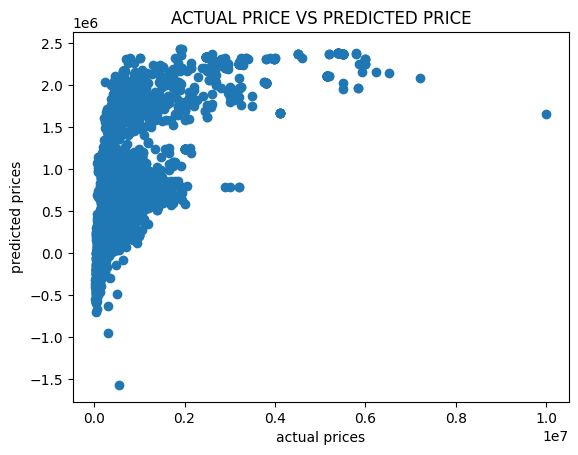

In [23]:
plt.scatter(y_train,lr_pred_train)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title("ACTUAL PRICE VS PREDICTED PRICE")

In [24]:
#prediction on test data
lr_pred_test=lr.predict(x_test)

In [25]:
#r_squared error
error_score=metrics.r2_score(y_test,lr_pred_test)
print("R SQUARED ERROR ",error_score)

R SQUARED ERROR  0.49358246735040245


Text(0.5, 1.0, 'ACTUAL PRICE VS PREDICTED PRICE')

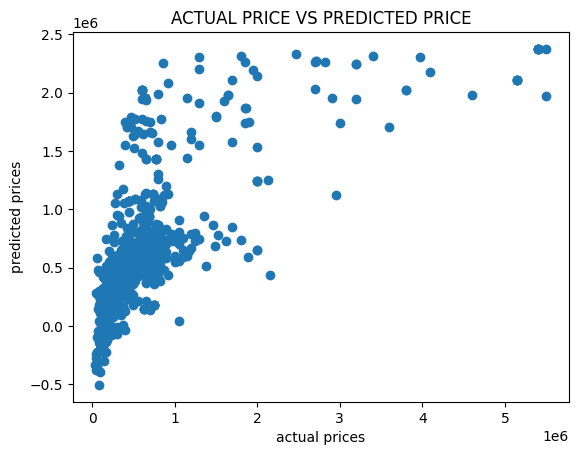

In [26]:
plt.scatter(y_test,lr_pred_test)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title("ACTUAL PRICE VS PREDICTED PRICE")

lasso regression

In [27]:
ls=Lasso()

In [28]:
ls.fit(x_train,y_train)

Lasso()

In [29]:
#prediction on train data
ls_pred_train=ls.predict(x_train)

In [30]:
#r square calculation
error_score2=metrics.r2_score(y_train,ls_pred_train)
print("ERROR SCORE ",error_score2)

ERROR SCORE  0.48505045130604396


Text(0.5, 1.0, 'ACTUAL PRICE VS PREDICTED PRICE')

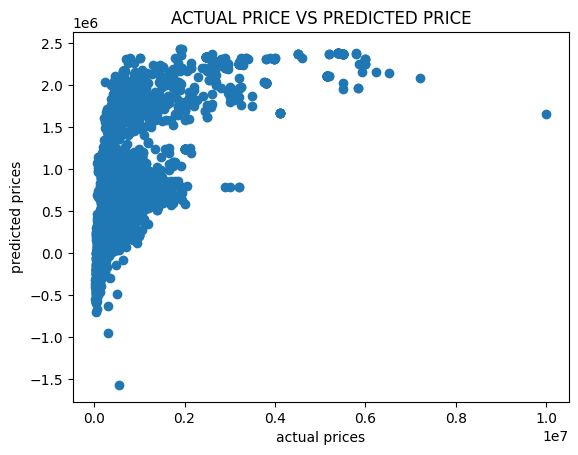

In [31]:
plt.scatter(y_train,ls_pred_train)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title("ACTUAL PRICE VS PREDICTED PRICE")

In [32]:
#prediction on test data
ls_pred_test=ls.predict(x_test)

In [33]:
#r square calculation
error_score2=metrics.r2_score(y_test,ls_pred_test)
print("ERROR SCORE ",error_score2)

ERROR SCORE  0.4935824242118163


Text(0.5, 1.0, 'ACTUAL PRICE VS PREDICTED PRICE')

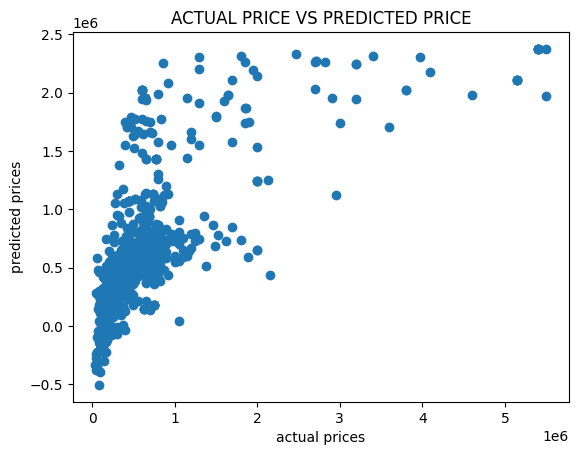

In [34]:
plt.scatter(y_test,ls_pred_test)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title("ACTUAL PRICE VS PREDICTED PRICE")

RandomForest Classifier

In [35]:
rf=RandomForestClassifier()

In [36]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [37]:
#prediction on train data
rf_pred_train=rf.predict(x_train)

In [38]:
#r square calculation
error_score3=metrics.r2_score(y_train,rf_pred_train)
print("ERROR SCORE ",error_score3)

ERROR SCORE  0.9108095601831699


Text(0.5, 1.0, 'ACTUAL PRICE VS PREDICTED PRICE')

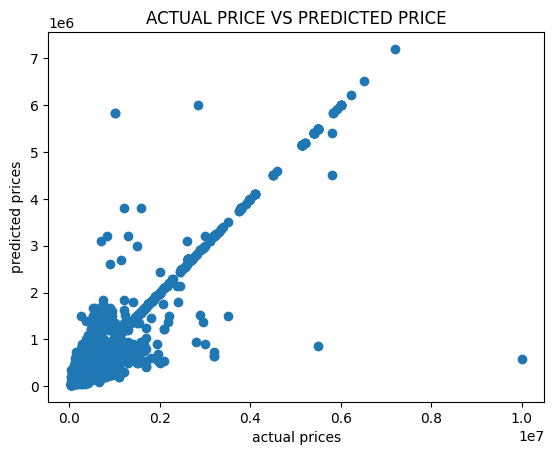

In [39]:
plt.scatter(y_train,rf_pred_train)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title("ACTUAL PRICE VS PREDICTED PRICE")

In [40]:
#prediction on test data
rf_pred_test=rf.predict(x_test)

In [41]:
#r square calculation
error_score4=metrics.r2_score(y_test,rf_pred_test)
print("ERROR SCORE ",error_score4)

ERROR SCORE  0.624804047268982


Text(0.5, 1.0, 'ACTUAL PRICE VS PREDICTED PRICE')

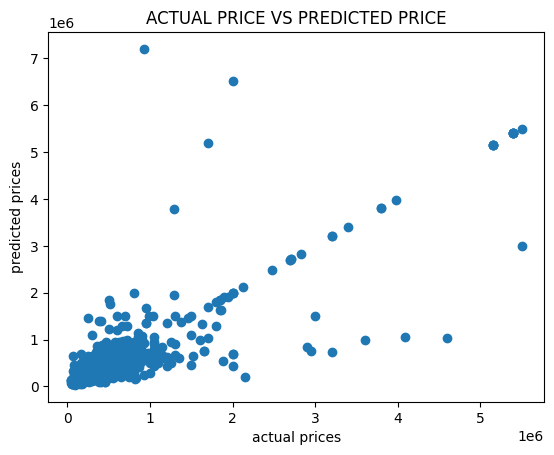

In [42]:
plt.scatter(y_test,rf_pred_test)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title("ACTUAL PRICE VS PREDICTED PRICE")

DecisionTreeClassifier

In [43]:
dt=DecisionTreeClassifier()

In [44]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
#prediction on train data
dt_pred_train=dt.predict(x_train)

In [65]:
#r square calculation
error_score5=metrics.r2_score(y_train,dt_pred_train)
print("ERROR SCORE ",error_score5)

ERROR SCORE  0.9063687183173058


In [66]:
#prediction on test data
dt_pred_test=dt.predict(x_test)

In [67]:
#r square calculation
error_score6=metrics.r2_score(y_test,dt_pred_test)
print("ERROR SCORE ",error_score6)

ERROR SCORE  0.6477670238977299


Text(0.5, 1.0, 'ACTUAL PRICE VS PREDICTED PRICE')

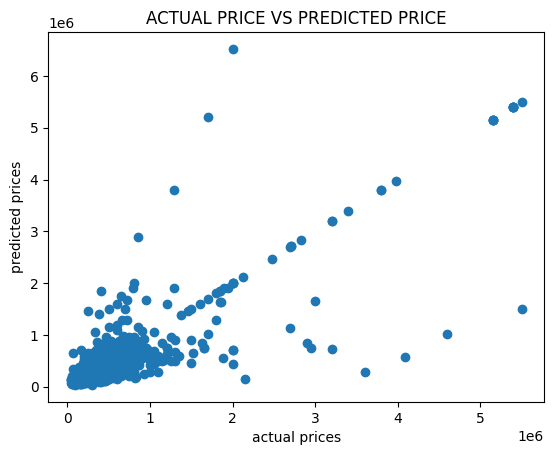

In [68]:
plt.scatter(y_test,dt_pred_test)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title("ACTUAL PRICE VS PREDICTED PRICE")

GradientBoostingRegressor


In [50]:
from sklearn.ensemble import GradientBoostingRegressor

In [51]:
gbr=GradientBoostingRegressor()

In [52]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [69]:
#prediction on train data
gbr_pred_train=gbr.predict(x_train)

In [70]:
#r square calculation
error_score7=metrics.r2_score(y_train,gbr_pred_train)
print("ERROR SCORE ",error_score7)

ERROR SCORE  0.8144250206463128


In [71]:
#prediction on test data
gbr_pred_test=gbr.predict(x_test)

In [72]:
#r square calculation
error_score8=metrics.r2_score(y_test,gbr_pred_test)
print("ERROR SCORE ",error_score8)

ERROR SCORE  0.7512271099369655


Text(0.5, 1.0, 'ACTUAL PRICE VS PREDICTED PRICE')

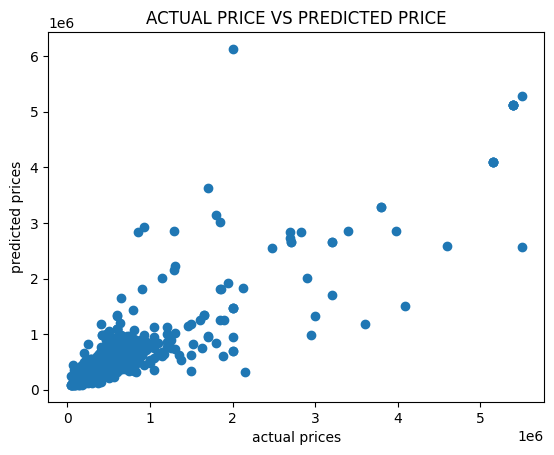

In [73]:
plt.scatter(y_test,gbr_pred_test)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title("ACTUAL PRICE VS PREDICTED PRICE")

xgboost

In [57]:
import xgboost as xgb

In [74]:
xgbm=xgb.XGBRegressor()

In [75]:
xgbm.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [76]:
#prediction on train data
xgbm_pred_train=rf.predict(x_train)

In [77]:
#r square calculation
error_score9=metrics.r2_score(y_train,xgbm_pred_train)
print("ERROR SCORE ",error_score9)

ERROR SCORE  0.9108095601831699


In [78]:
#prediction on test data
xgbm_pred_test=xgbm.predict(x_test)

In [79]:
#r square calculation
error_score10=metrics.r2_score(y_test,xgbm_pred_test)
print("ERROR SCORE ",error_score10)

ERROR SCORE  0.6907109289314656


### **Saving the best model(gradient boosting regressor)**

---



In [81]:
gbr=GradientBoostingRegressor()

In [83]:
gbr_final=gbr.fit(x,y)

In [84]:
import joblib

In [85]:
joblib.dump(gbr_final,'car_price_predictor')

['car_price_predictor']

In [86]:
model=joblib.load('car_price_predictor')

***Testing the model***

In [87]:
data_new=pd.DataFrame({
    'year':2007, 
    'km_driven':120000,  
    'fuel':0,  
    'seller_type':1,  
    'transmission':0,
    'owner':0
},index=[0])

In [88]:
model.predict(data_new)

array([132194.26709927])